In [341]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

In [342]:
df = pd.read_csv("strokedata.csv",na_values=['Unknown'])
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Drop ID

In [343]:

df = df.drop('id',axis=1)

df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [344]:
number_of_unknown= df['smoking_status'].value_counts()
number_of_unknown





smoking_status
never smoked       1892
formerly smoked     884
smokes              789
Name: count, dtype: int64

One hot encoder for gender

In [345]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Create 'ismale' and 'isfemale' columns based on 'gender'
df['is_male'] = df['gender'].apply(lambda x: 1 if x == 1 else 0)
df['is_female'] = df['gender'].apply(lambda x: 1 if x == 0 else 0)

# Drop the original 'gender' column if needed
df.drop('gender', axis=1, inplace=True)
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0
1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,1
2,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,0
3,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1


Inplace for ever_married

In [346]:
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,1,0
1,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1,0,1
2,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1,1,0
3,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1,0,1
4,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,0,1


Inplace for residence_type

In [347]:
df['Residence_type'] = df['Residence_type'].replace({'Urban': 1, 'Rural': 0})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,1,0
1,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1,0,1
2,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,1,0
3,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,0,1
4,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,0,1


Inplace Work Type

In [348]:
df['work_type'] = df['work_type'].replace({'Private': 5,'Self-employed': 4,'Govt_job': 3,'children': 2, 'Never_worked': 1})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,5,1,228.69,36.6,formerly smoked,1,1,0
1,61.0,0,0,1,4,0,202.21,NaN,never smoked,1,0,1
2,80.0,0,1,1,5,0,105.92,32.5,never smoked,1,1,0
3,49.0,0,0,1,5,1,171.23,34.4,smokes,1,0,1
4,79.0,1,0,1,4,0,174.12,24.0,never smoked,1,0,1


Inplace Smoking Status

In [349]:
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked': 3,'smokes': 2,'never smoked': 1})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,5,1,228.69,36.6,3.0,1,1,0
1,61.0,0,0,1,4,0,202.21,NaN,1.0,1,0,1
2,80.0,0,1,1,5,0,105.92,32.5,1.0,1,1,0
3,49.0,0,0,1,5,1,171.23,34.4,2.0,1,0,1
4,79.0,1,0,1,4,0,174.12,24.0,1.0,1,0,1


Forward Manner

In [350]:
#df ['smoking_status'].fillna(1,inplace= True)

In [351]:
df.shape
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,5,1,228.69,36.6,3.0,1,1,0
1,61.0,0,0,1,4,0,202.21,NaN,1.0,1,0,1
2,80.0,0,1,1,5,0,105.92,32.5,1.0,1,1,0
3,49.0,0,0,1,5,1,171.23,34.4,2.0,1,0,1
4,79.0,1,0,1,4,0,174.12,24.0,1.0,1,0,1


In [352]:
numbernan = df.isna().sum()
numbernan

age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
is_male                 0
is_female               0
dtype: int64

Randomly Dropping 1000  '0' stroke  values to balanced the data

In [353]:
np.random.seed(250)

remove_n = 1000

drop_indices = np.random.choice(df.index, remove_n, replace=False)
df.drop(drop_indices,inplace=True)

Copy the original data frame

In [354]:
df_copy = df
df_copy

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,5,1,228.69,36.6,3.0,1,1,0
1,61.0,0,0,1,4,0,202.21,NaN,1.0,1,0,1
2,80.0,0,1,1,5,0,105.92,32.5,1.0,1,1,0
4,79.0,1,0,1,4,0,174.12,24.0,1.0,1,0,1
5,81.0,0,0,1,5,1,186.21,29.0,3.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5103,13.0,0,0,0,2,0,103.08,18.6,NaN,0,0,1
5104,80.0,1,0,1,5,1,83.75,NaN,1.0,0,0,1
5105,81.0,0,0,1,4,1,125.20,40.0,1.0,0,0,1
5106,35.0,0,0,1,4,0,82.99,30.6,1.0,0,0,1


find the average score

In [355]:
without_NaN = df_copy.dropna()
average_score = without_NaN['bmi'].mean()
average_score


30.33049619703006

In [356]:
missing_score_rows = df[df['bmi'].isna()]
print("Rows with missing 'bmi':")
print(missing_score_rows)
print(f"\n\nAverage Score is: {average_score} ")
print("\nDataFrame after filling missing 'bmi' values:")
print(df)


Rows with missing 'bmi':
        age  hypertension  heart_disease  ever_married  work_type  \
1     61.00             0              0             1          4   
19    57.00             0              1             0          3   
27    58.00             0              0             1          5   
43    63.00             0              0             1          5   
46    75.00             0              1             0          4   
...     ...           ...            ...           ...        ...   
4933   1.32             0              0             0          2   
4983  31.00             0              0             0          5   
5038  41.00             0              0             0          5   
5098  40.00             0              0             1          5   
5104  80.00             1              0             1          5   

      Residence_type  avg_glucose_level  bmi  smoking_status  stroke  is_male  \
1                  0             202.21  NaN             1.0     

In [357]:
 df_copy['bmi'].fillna(average_score,inplace= True)
 df_copy.describe()


,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
count,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,2872.000000,4109.000000,4109.000000,4109.000000
mean,43.531234,0.101241,0.054271,0.660745,4.153809,0.503772,106.095464,28.990251,1.727716,0.048917,0.413239,0.586761
std,22.642373,0.301685,0.226579,0.473514,1.115396,0.500047,45.219865,7.669984,0.838609,0.215721,0.492475,0.492475
min,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,55.220000,11.300000,1.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,3.000000,0.000000,77.240000,23.900000,1.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,5.000000,1.000000,91.960000,28.400000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,0.000000,0.000000,1.000000,5.000000,1.000000,114.210000,32.800000,3.000000,0.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,97.600000,3.000000,1.000000,1.000000,1.000000


Forward Manner for smoking status ( We use forward manner beacause of the last smoking status is NaN, and Ml not accept the nan)

In [358]:
df_copy.ffill(axis=0,inplace=True)
df_copy

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,5,1,228.69,36.600000,3.0,1,1,0
1,61.0,0,0,1,4,0,202.21,30.330496,1.0,1,0,1
2,80.0,0,1,1,5,0,105.92,32.500000,1.0,1,1,0
4,79.0,1,0,1,4,0,174.12,24.000000,1.0,1,0,1
5,81.0,0,0,1,5,1,186.21,29.000000,3.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5103,13.0,0,0,0,2,0,103.08,18.600000,1.0,0,0,1
5104,80.0,1,0,1,5,1,83.75,30.330496,1.0,0,0,1
5105,81.0,0,0,1,4,1,125.20,40.000000,1.0,0,0,1
5106,35.0,0,0,1,4,0,82.99,30.600000,1.0,0,0,1


Solving Imbalanced Problem

stroke
0    3908
1     201
Name: count, dtype: int64

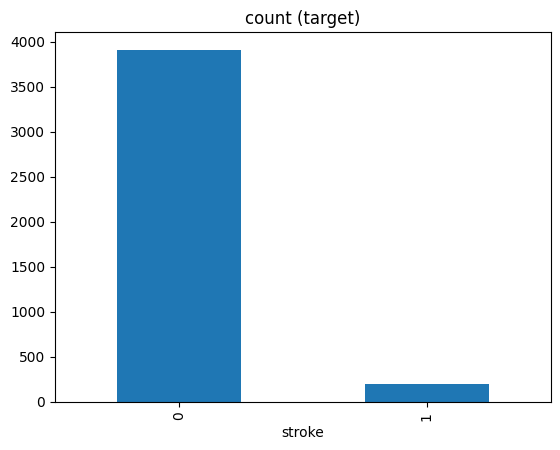

In [359]:
df['stroke'].value_counts().plot(kind='bar', title='count (target)')
df['stroke'].value_counts()

stroke
0    3908
1     201
Name: count, dtype: int64

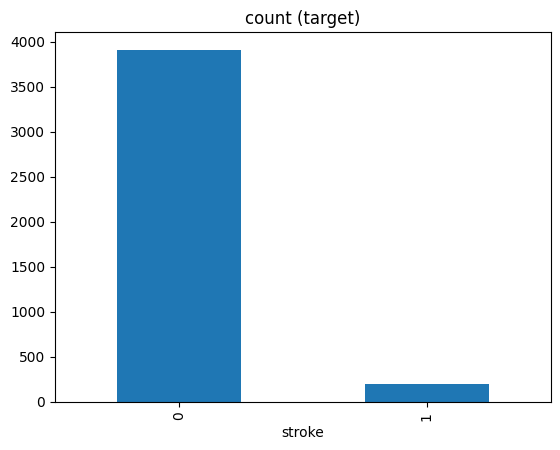

In [361]:
df_copy['stroke'].value_counts().plot(kind='bar', title='count (target)')
df_copy['stroke'].value_counts()

       age  hypertension  heart_disease  ever_married  work_type  \
0     67.0             0              1             1          5   
1     61.0             0              0             1          4   
2     80.0             0              1             1          5   
4     79.0             1              0             1          4   
5     81.0             0              0             1          5   
...    ...           ...            ...           ...        ...   
5103  13.0             0              0             0          2   
5104  80.0             1              0             1          5   
5105  81.0             0              0             1          4   
5106  35.0             0              0             1          4   
5108  44.0             0              0             1          3   

      Residence_type  avg_glucose_level        bmi  smoking_status  is_male  \
0                  1             228.69  36.600000             3.0        1   
1                  0     

<Axes: title={'center': 'count (target)'}, xlabel='stroke'>

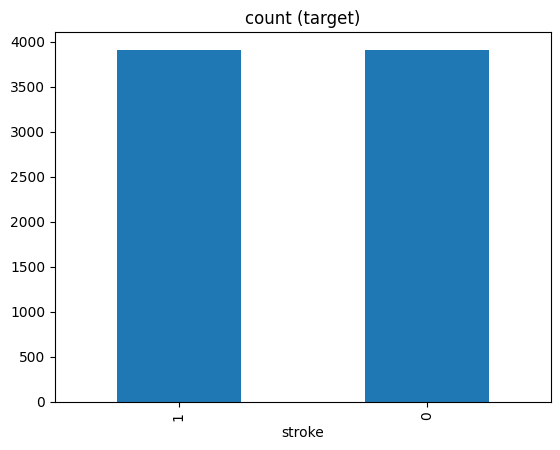

In [362]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
 
ros = RandomOverSampler(random_state=42)
y = df_copy['stroke']
x = df_copy.drop(columns=['stroke'])


# fit predictor and target variable 
x_ros, y_ros = ros.fit_resample(x, y)

y_ros_df = pd.DataFrame(y_ros, columns=['stroke'])
x_ros_df = pd.DataFrame(x_ros, columns=x.columns)


print(x)
frames = [x_ros_df,y_ros_df];
df_copy = pd.concat(frames, axis=1)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))

df_copy['stroke'].value_counts().plot(kind='bar', title='count (target)')


In [363]:
df_copy.describe()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,is_male,is_female,stroke
count,7816.000000,7816.000000,7816.000000,7816.000000,7816.000000,7816.000000,7816.000000,7816.000000,7816.00000,7816.000000,7816.000000,7816.000000
mean,54.845010,0.183214,0.117195,0.766377,4.308470,0.504222,117.762262,29.720104,1.84826,0.432830,0.567170,0.500000
std,22.133703,0.386867,0.321674,0.423162,0.968954,0.500014,54.786066,6.947263,0.87578,0.495499,0.495499,0.500032
min,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,55.220000,11.300000,1.00000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,1.000000,4.000000,0.000000,77.820000,25.400000,1.00000,0.000000,0.000000,0.000000
50%,59.000000,0.000000,0.000000,1.000000,5.000000,1.000000,96.015000,29.600000,2.00000,0.000000,1.000000,0.500000
75%,74.000000,0.000000,0.000000,1.000000,5.000000,1.000000,144.367500,32.600000,3.00000,1.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,97.600000,3.00000,1.000000,1.000000,1.000000


<Axes: ylabel='count'>

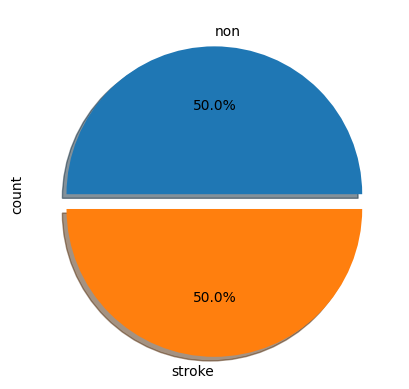

In [364]:
df_copy['stroke'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","stroke"], shadow=True)


# Visulization 

### Scatter Plot

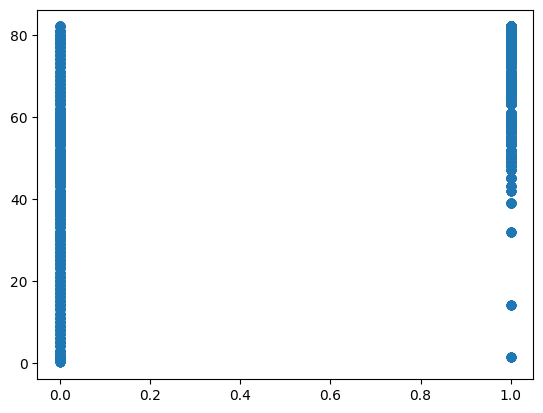

In [365]:

area = (30 * np.random.rand(100))**2
plt.scatter(df_copy['stroke'], df_copy['age'])

plt.show()

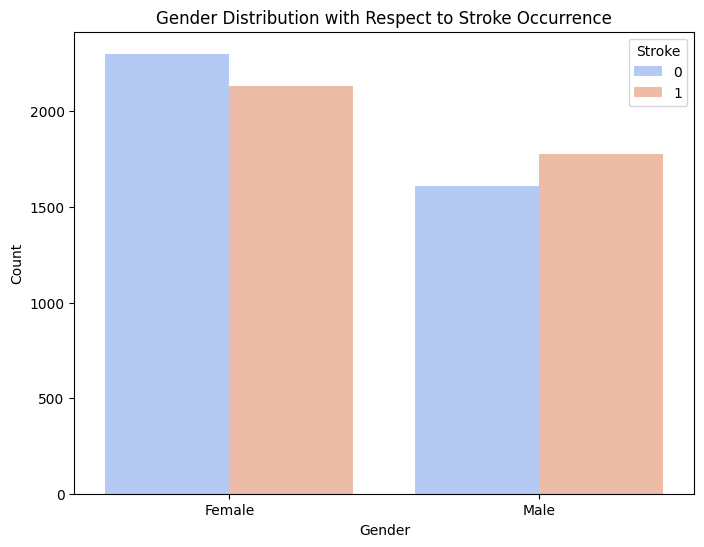

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'is_male' and 'is_female' columns exist in your DataFrame
gender_stroke = df_copy.groupby(['is_male', 'is_female', 'stroke']).size().reset_index(name='count')

# Merging gender columns into a single 'Gender' column
gender_stroke['Gender'] = gender_stroke.apply(lambda x: 'Male' if x['is_male'] == 1 else 'Female', axis=1)

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='count', hue='stroke', data=gender_stroke, palette='coolwarm')
plt.title('Gender Distribution with Respect to Stroke Occurrence')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.show()


## Pair Plot to analyze the Numerical Features by Stroke

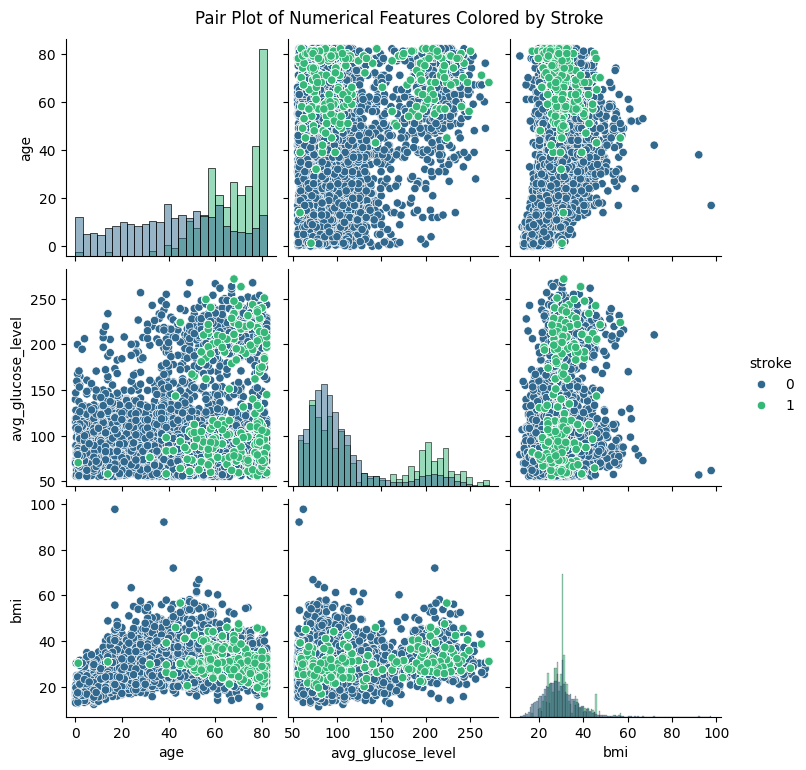

In [375]:
import seaborn as sns

# Selecting numerical columns for pair plot
numerical_cols = ['age', 'avg_glucose_level', 'bmi', 'stroke']

# Filtering the DataFrame to include only numerical columns
df_numerical = df_copy[numerical_cols]

# Creating pair plot colored by 'stroke'
sns.pairplot(df_numerical, hue='stroke', palette='viridis', diag_kind='hist')
plt.suptitle('Pair Plot of Numerical Features Colored by Stroke', y=1.02)
plt.show()


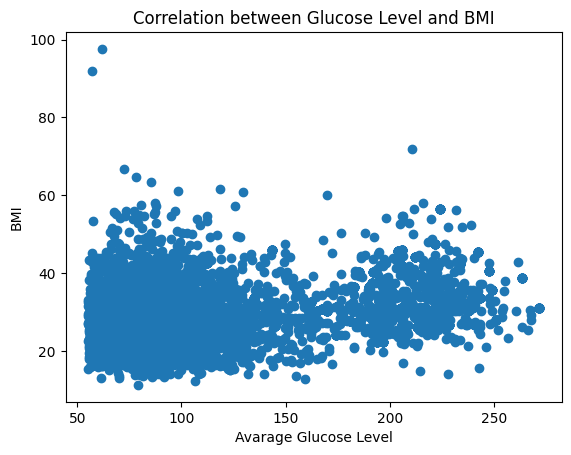

In [371]:

area = (30 * np.random.rand(100))**2
plt.scatter(df_copy['avg_glucose_level'], df_copy['bmi'])
plt.xlabel('Avarage Glucose Level')
plt.ylabel('BMI')
plt.title('Correlation between Glucose Level and BMI')
plt.show()

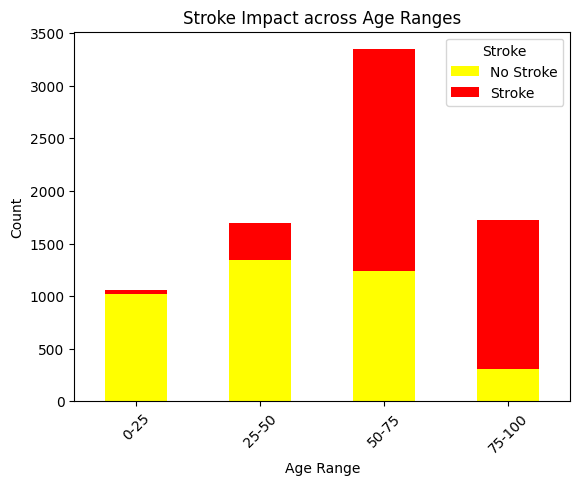

In [366]:

# Assuming df_copy contains your dataset
ranges_value= [0, 25, 50, 75, 100]  # Define your age bins
labels = ['0-25', '25-50', '50-75', '75-100']  # Labels for the bins

# Crosstabulation between age ranges and stroke with dynamic binning
show_age_impact = pd.crosstab(pd.cut(df_copy['age'], bins= ranges_value, labels=labels), df_copy['stroke'])

# Plotting the crosstab data
show_age_impact.plot(kind='bar', stacked=True, color=['yellow', 'red'], grid=False)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Stroke Impact across Age Ranges')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

### Bar Plot for Ever Married & Age

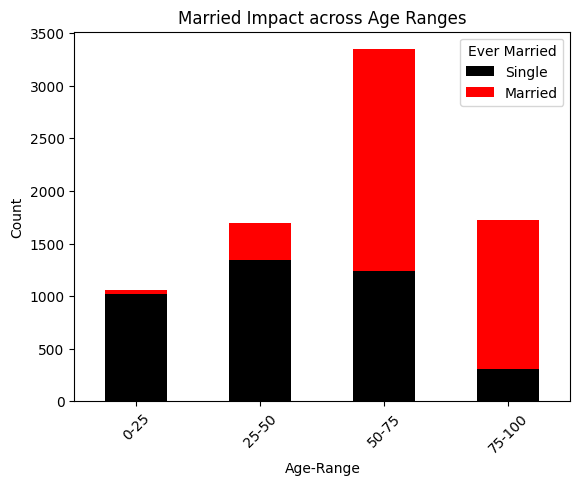

In [367]:
ranges_value= [0, 25, 50, 75, 100]  # Define your age bins
labels = ['0-25', '25-50', '50-75', '75-100']  # Labels for the bins
show_age_impact_married = pd.crosstab(pd.cut(df_copy['age'], bins= ranges_value, labels=labels), df_copy['ever_married'])

# Plotting the crosstab data
show_age_impact.plot(kind='bar', stacked=True, color=['black', 'red'], grid=False)
plt.xlabel('Age-Range')
plt.ylabel('Count')
plt.title('Married Impact across Age Ranges')
plt.legend(title='Ever Married', labels=['Single', 'Married'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

HeatMap for DataFrame

<Axes: >

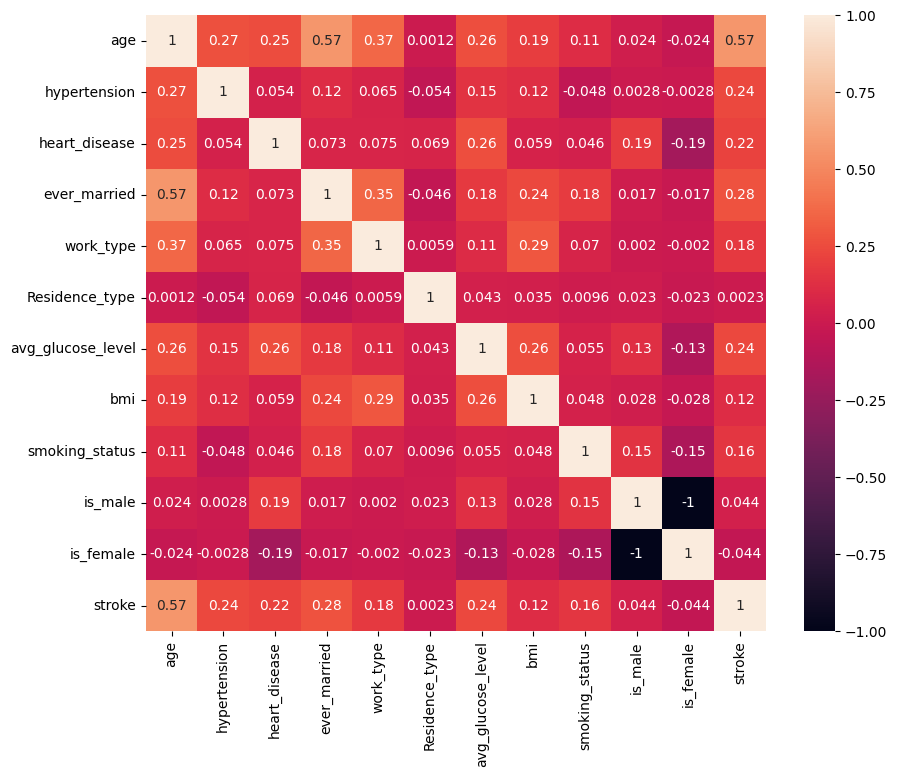

In [368]:
corrl = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrl,annot=True)

# Feature Selection

In [461]:
from sklearn.feature_selection import SelectKBest, chi2, RFE, mutual_info_classif
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier

X = df_copy.drop(columns=['stroke'])
y = df_copy['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables to keep track of the best feature selection method and its score
best_method = ""
best_score = 0


## K-best for bmi with mean

In [462]:

# Feature selection using SelectKBest (chi2)
select_k_best = SelectKBest(score_func=chi2, k=4)
X_new = select_k_best.fit_transform(X_train, y_train)
x_test_new = select_k_best.transform(X_test)
clf = RandomForestClassifier()
clf.fit(X_new, y_train)
y_pred = clf.predict(x_test_new)
score = clf.score(select_k_best.transform(X_test), y_test)
accuray =accuracy_score(y_test,y_pred)
print("SelectKBest (chi2) Score:", score)
if score > best_score:
    best_score = score
    best_method = "SelectKBest (chi2)"
print("SelectKBest (chi2) accuracy:", accuray)
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

SelectKBest (chi2) Score: 0.9827365728900256
SelectKBest (chi2) accuracy: 0.9827365728900256
[[752  27]
 [  0 785]]


## RFE

In [463]:
num_features_to_select = min(4, len(X_train.columns))  # Ensure it's not greater than the number of features
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=num_features_to_select)
X_new = rfe.fit_transform(X_train, y_train)
clf.fit(X_new, y_train)
score = clf.score(rfe.transform(X_test), y_test)
print("RFE Score:", score)
if score > best_score:
    best_score = score
    best_method = "RFE"

RFE Score: 0.9820971867007673


# Logistic Regression

In [464]:
from sklearn.linear_model import LogisticRegression

Logistic_model = LogisticRegression(random_state=42, max_iter=10000)
Logistic_model.fit(X_train, y_train)
y_pred = Logistic_model.predict(X_test)

score = Logistic_model.score(X_test, y_test)
print("Logistic Regression Score: ", score)

if score > best_score:
    best_score = score
    best_method = "Logistic Regression"


Logistic Regression Score:  0.7838874680306905


## Ridge

In [465]:
# Feature selection using Ridge for feature importance
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
# Estimate feature importance based on the magnitude of the coefficients
feature_importance = np.abs(ridge.coef_)


num_features_to_select = 11
selected_feature_indices = np.argsort(feature_importance)[::-1][:num_features_to_select]

# Use iloc to select the corresponding columns from the DataFrame
selected_features = X_train.iloc[:, selected_feature_indices]

clf.fit(selected_features, y_train)
score = clf.score(X_test.iloc[:, selected_feature_indices], y_test)
# print(len(selected_features.columns))
print("Ridge (Feature Importance) Score:", score)
if score > best_score:
    best_score = score
    best_method = "Ridge (Feature Importance)"


Ridge (Feature Importance) Score: 0.9936061381074168


## MIC (Mutual Informatıon Classification)

In [466]:
# Feature selection using MIC (mutual_info_classif)
mic = SelectKBest(score_func=mutual_info_classif, k=4)
X_new = mic.fit_transform(X_train, y_train)
clf.fit(X_new, y_train)
score = clf.score(mic.transform(X_test), y_test)
print("MIC (mutual_info_classif) Score:", score)
if score > best_score:
    best_score = score
    best_method = "MIC (mutual_info_classif)"



MIC (mutual_info_classif) Score: 0.981457800511509


## PCA

In [467]:
pca_model = PCA(n_components=4)
X_new_train = pca_model.fit_transform(X_train)
X_new_test = pca_model.transform(X_test)

RandomForest_model = RandomForestClassifier(random_state=42)
RandomForest_model.fit(X_new_train, y_train)

score = RandomForest_model.score(X_new_test, y_test)
print("PCA + Random Forest Score:", score)

if score > best_score:
    best_score = score
    best_method = "PCA + Random Forest"

PCA + Random Forest Score: 0.9859335038363172


# Lasso

In [468]:
lasso = Lasso(alpha=0.1)  # Set your alpha value
lasso.fit(X_train, y_train)


y_pred = lasso.predict(X_test)

score = accuracy_score(y_test, y_pred.round())  # recall_score is high !!!

print("Lasso Regression Score:", score)

# Update best score and method if applicable
if score > best_score:
    best_score = score
    best_method = "Lasso Regression"

Lasso Regression Score: 0.7461636828644501


# KNN

In [481]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
score = knn_model.score(X_test, y_test)
print("KNN Model Score: ", score)

if score > best_score:
    best_score = score
    best_method = "KNN Model"

KNN Model Score:  0.90153452685422


## Best Score of the Models'

In [482]:
# Print the best feature selection method and its score
print("Best feature selection method:", best_method)
print("Best score:", best_score)

Best feature selection method: Ridge (Feature Importance)
Best score: 0.9936061381074168
